In [1]:
import ML_basic_function as fc
from ML_basic_function import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn import cluster
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import time
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
import inspect, re
from sklearn.preprocessing import PolynomialFeatures
from itertools import product
from sklearn.preprocessing import OrdinalEncoder
from tqdm import tqdm
import gc
from sklearn.feature_selection import VarianceThreshold,r_regression,SelectKBest,f_regression,SelectPercentile,chi2,f_classif,mutual_info_regression,mutual_info_classif,RFE,RFECV,SequentialFeatureSelector,SelectFromModel
from scipy import stats
import scipy
import random
from joblib import dump, load
from scipy.special import digamma
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from hyperopt import hp, fmin, tpe
from numpy.random import RandomState
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier as GBC
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [2]:
X_train = pd.read_csv("fff/X_train.csv")
X_test = pd.read_csv("fff/X_test.csv")
y_train = pd.read_csv("fff/y_train.csv")
y_test = pd.read_csv("fff/y_test.csv")

In [3]:
X_train.shape

(24444, 2598)

In [4]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [5]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# 模型训练

## 随机森林

In [ ]:
# 设置超参数空间
parameter_space = {
    "min_samples_leaf": list(np.arange(1, 35, 5)), 
    "min_samples_split": list(np.arange(2, 38, 5)),
    "max_depth": np.arange(26, 34, 2),
    "max_leaf_nodes": [None] + list(np.arange(3230, 3420, 30)), 
    "n_estimators": np.arange(50, 320, 25), 
    "max_features":['sqrt', 'log2'] + list(np.arange(100, 2598, 200)), 
    "max_samples":[None, 0.4, 0.5, 0.6, 0.7]}

# 实例化模型与评估器
RF_1 = RandomForestClassifier(random_state=5780)
grid_RF_1 = GridSearchCV(RF_1, parameter_space, n_jobs=30)

# 模型训练
grid_RF_1.fit(X_train1, y_train1)

In [25]:
param_grid_simple = {'n_estimators': hp.quniform("n_estimators",450,501,1)
                     , 'max_depth': hp.quniform("max_depth",25,36,1)
                     , "min_samples_leaf":hp.quniform("min_samples_leaf",1,2,1)
                     , "min_samples_split":hp.quniform("min_samples_split",15,25,1)
                     , "max_leaf_nodes":hp.quniform("max_leaf_nodes",3230,3281,1)
                    } 

In [26]:
# 定义目标函数
def hyperopt_objective(params):
    clf = RandomForestClassifier(n_estimators = int(params["n_estimators"])
                                 ,max_depth = int(params["max_depth"])
                                 
                                 ,min_samples_leaf = int(params["min_samples_leaf"])
                                 ,min_samples_split = int(params["min_samples_split"])
                                 ,max_leaf_nodes = int(params["max_leaf_nodes"])
                                 ,random_state = 5780
                                 ,verbose = False
                                 ,n_jobs = 30)
    
    #交叉验证结果，输出准确率
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    #最终输出结果，由于只能取最小值，所以必须对（-RMSE）求绝对值
    #以求解最小RMSE所对应的参数组合
    return -score

In [27]:
# 定义优化函数
def param_hyperopt(max_evals):
    #定义代理模型
    params_best = fmin(fn = hyperopt_objective #目标函数
                       , space = param_grid_simple #参数空间
                       , algo = tpe.suggest 
                       , max_evals = max_evals #允许的迭代次数
                      )
    return params_best

In [28]:
params_best = param_hyperopt(1500) 

 33%|█████████████▌                           | 495/1500 [1:18:50<2:40:03,  9.56s/trial, best loss: -0.899128727451221]


KeyboardInterrupt: 

In [12]:
params_best

{'max_depth': 31.0,
 'max_leaf_nodes': 3263.0,
 'min_samples_leaf': 1.0,
 'min_samples_split': 19.0,
 'n_estimators': 484.0}

In [ ]:
param_grid_simple = {'n_estimators': hp.quniform("n_estimators",50,400,1)
                     , 'max_depth': hp.quniform("max_depth",10,31,1)
                     , "max_features": hp.quniform("max_features",50,2598,1)
                     , "min_samples_leaf":hp.quniform("min_samples_leaf",3,50,1)
                     , "min_samples_split":hp.quniform("min_samples_split",5,50,1)
                     , "max_leaf_nodes":hp.quniform("max_leaf_nodes",3000,3401,1)
                     , "max_samples":hp.quniform("max_samples",0.4,0.8,0.1)
                     , 'random_state': hp.quniform("random_state",0,1000,1)
                    }

In [6]:
clf = RandomForestClassifier(random_state = 4405, 
                             n_jobs = 30, 
                             max_depth = 35,
                             max_leaf_nodes = 3251,
                             min_samples_leaf = 1,
                             min_samples_split = 19,
                             n_estimators = 501)
clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.900110442999141, 0.954140075274096)

In [148]:
dump(clf, 'clf.joblib') 

['clf.joblib']

In [6]:
clf = load('clf.joblib') 

In [8]:
score = []
for i in tqdm(np.arange(500, 600, 1)):
    clf = RandomForestClassifier(random_state = 4405, n_jobs = 30, max_depth = 35,
                                 max_leaf_nodes = 3251,
                                 min_samples_leaf = 1,
                                 min_samples_split = 19,
                                 n_estimators = i)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
print(max(score))
print(np.argmax(score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:18<00:00,  9.19s/it]

0.900110442999141
1


In [7]:
precision_score(y_test, clf.predict(X_test)) #精确度

0.9321064411837852

In [8]:
recall_score(y_test, clf.predict(X_test))

0.8738633714152483

In [9]:
f1_score(y_test, clf.predict(X_test))

0.9020457280385078

In [10]:
AUC(y_test, clf.predict_proba(X_test)[:, 1])

0.952721445510083

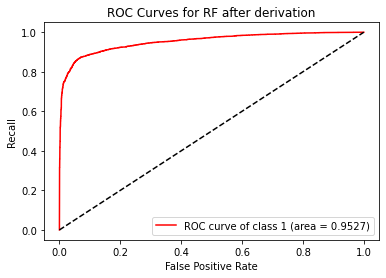

In [11]:
FPR, recall, thesholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label = 1)
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve of class 1 (area = %0.4f)' % AUC(y_test, clf.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC Curves for RF after derivation')
plt.legend(loc="lower right")
plt.savefig("RF_after",dpi=1000)
plt.show()

## GBDT

In [75]:
clf_GBDT = GBC(random_state=1412)

In [76]:
clf_GBDT.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1412)

In [77]:
clf_GBDT.score(X_test, y_test)

0.8855074242238311

In [82]:
param_grid_simple = {'n_estimators': hp.quniform("n_estimators",25,200,25)
                  ,"lr": hp.quniform("learning_rate",0.05,2.05,0.05)
                  ,"max_features": hp.choice("max_features",["log2","sqrt",100,1000,2000])
                 }

In [83]:
def hyperopt_objective(params):
    clf_GBDT = GBC(n_estimators = int(params["n_estimators"])
              ,learning_rate = params["lr"]
              ,max_features = params["max_features"]
              ,init = clf
              ,random_state=1412
              ,verbose=False)
    clf_GBDT.fit(X_train, y_train)
    score = clf_GBDT.score(X_test, y_test)
    return -score

In [84]:
# 定义优化函数
def param_hyperopt(max_evals):
    #定义代理模型
    params_best = fmin(fn = hyperopt_objective #目标函数
                       , space = param_grid_simple #参数空间
                       , algo = tpe.suggest 
                       , max_evals = max_evals #允许的迭代次数
                      )
    return params_best

In [85]:
params_best = param_hyperopt(100)

100%|████████████████████████████████████████████| 100/100 [1:55:29<00:00, 69.29s/trial, best loss: -0.900846729660081]


In [86]:
params_best

{'learning_rate': 0.1, 'max_features': 4, 'n_estimators': 75.0}

In [29]:
clf_GBDT = GBC(n_estimators = 75
              ,learning_rate = 0.1
              ,max_features = 2000
              ,init = clf
              ,random_state=1413
              ,verbose=False)
clf_GBDT.fit(X_train, y_train)
clf_GBDT.score(X_test, y_test), clf_GBDT.score(X_train, y_train)

(0.901460301877531, 0.9568401243658976)

In [30]:
dump(clf_GBDT, 'clf_GBDT.joblib') 

['clf_GBDT.joblib']

In [12]:
clf_GBDT = load('clf_GBDT.joblib') 
clf_GBDT.score(X_test, y_test), clf_GBDT.score(X_train, y_train)

(0.901460301877531, 0.9568401243658976)

In [13]:
precision_score(y_test, clf_GBDT.predict(X_test)) #精确度

0.9331510934393639

In [14]:
recall_score(y_test, clf_GBDT.predict(X_test))

0.875495453485661

In [15]:
f1_score(y_test, clf_GBDT.predict(X_test))

0.9034043065078794

In [16]:
AUC(y_test, clf_GBDT.predict_proba(X_test)[:, 1])

0.9538254868158937

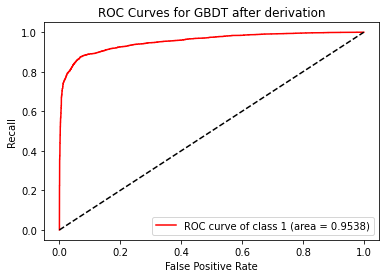

In [17]:
FPR, recall, thesholds = roc_curve(y_test, clf_GBDT.predict_proba(X_test)[:, 1], pos_label = 1)
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve of class 1 (area = %0.4f)' % AUC(y_test, clf_GBDT.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC Curves for GBDT after derivation')
plt.legend(loc="lower right")
plt.savefig("GBDT_after",dpi=1000)
plt.show()

## XGBoost

In [18]:
data_train = xgb.DMatrix(X_train, y_train)
data_test = xgb.DMatrix(X_test, y_test)

0.8934838630506811
12


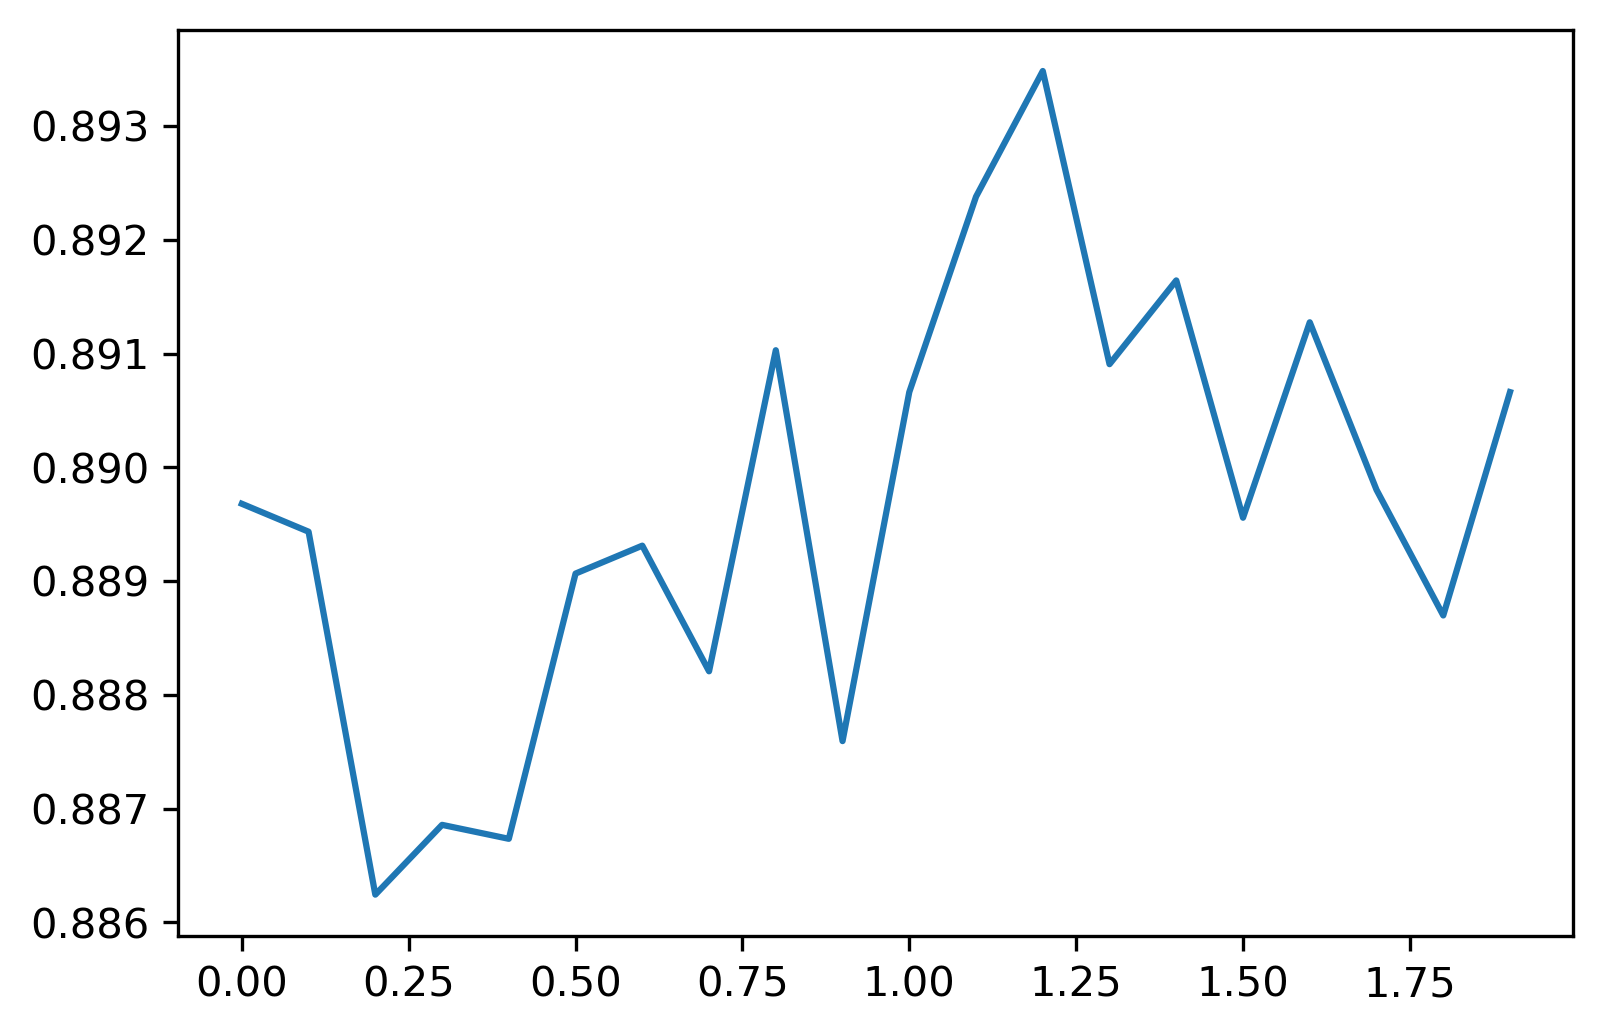

In [99]:
score = []
for i in np.arange(0, 2, 0.1):
    params1 = {"seed":1, "objective":"binary:logistic"
               ,"eval_metric":"logloss" #二分类交叉熵损失
               ,"gamma": i
              }
    clf_xgb = xgb.train(params1, data_train, num_boost_round=100)
    y_pred = clf_xgb.predict(data_test)
    score.append(accuracy_score(y_test, (y_pred > 0.5).astype(int)))

plt.figure(dpi = 300)
plt.plot(list(np.arange(0, 2, 0.1)), score)
print(max(score))
print(np.argmax(score))

In [92]:
y_pred = clf_xgb.predict(data_test)

In [97]:
accuracy_score(y_test, (y_pred > 0.5).astype(int))

0.8896797153024911

In [ ]:
score.append(clf.score(X_test, y_test))
print(max(score))
print(np.argmax(score))

In [101]:
 params1 = {"seed":1, "objective":"binary:logistic"
               ,"eval_metric":"logloss" #二分类交叉熵损失
               ,"gamma": 1.2
              }
clf_xgb = xgb.train(params1, data_train, num_boost_round=100)
y_pred = clf_xgb.predict(data_test)
accuracy_score(y_test, (y_pred > 0.5).astype(int))

0.8934838630506811

In [132]:
param_grid_simple = {'num_boost_round': hp.quniform("num_boost_round",70,400,10)
                     ,"eta": hp.quniform("eta",0.05,3.05,0.05)
                     ,"gamma":hp.quniform("gamma",0, 3.1, 0.05)
                    }

In [133]:
def hyperopt_objective(params):
    paramsforxgb = {"eta":params["eta"]
                    ,"gamma":params["gamma"]
                    ,"objective":"binary:logistic"
                    ,"nthread":30
                    ,"verbosity":0
                    ,"seed":1412}
    clf_xgb = xgb.train(paramsforxgb, data_train, num_boost_round = int(params["num_boost_round"]))
    y_pred = clf_xgb.predict(data_test)
    score = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    return -score

In [134]:
# 定义优化函数
def param_hyperopt(max_evals):
    #定义代理模型
    params_best = fmin(fn = hyperopt_objective #目标函数
                       , space = param_grid_simple #参数空间
                       , algo = tpe.suggest 
                       , max_evals = max_evals #允许的迭代次数
                      )
    return params_best

In [136]:
params_best = param_hyperopt(1500)

100%|█████████████████████████████████████████| 1500/1500 [22:18:06<00:00, 53.52s/trial, best loss: -0.897165296355381]


In [137]:
params_best

{'eta': 0.05, 'gamma': 3.0500000000000003, 'num_boost_round': 390.0}

In [146]:
paramsforxgb = {"eta":0.05
                    ,"gamma":3.05
                    ,"objective":"binary:logistic"
                    ,"nthread":30
                    ,"verbosity":0
                    ,"seed":1412}
clf_xgb = xgb.train(paramsforxgb, data_train, num_boost_round = 380)
y_pred = clf_xgb.predict(data_test)
accuracy_score(y_test, (y_pred > 0.5).astype(int))

0.897165296355381

In [143]:
score = []
for i in tqdm(np.arange(3, 3.5, 0.05)):
    paramsforxgb = {"eta":0.05
                    ,"gamma":i
                    ,"objective":"binary:logistic"
                    ,"nthread":30
                    ,"verbosity":0
                    ,"seed":1412}
    clf_xgb = xgb.train(paramsforxgb, data_train, num_boost_round = 380)
    y_pred = clf_xgb.predict(data_test)
    score.append(accuracy_score(y_test, (y_pred > 0.5).astype(int)))

print(max(score))
print(np.argmax(score))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [07:29<00:00, 44.90s/it]

0.897165296355381
1


In [41]:
paramsforxgb = {"eta":0.05
                    ,"gamma":3.05
                    ,"objective":"binary:logistic"
                    ,"nthread":30
                    ,"verbosity":0
                    ,"seed":1412}
clf_xgb = xgb.train(paramsforxgb, data_train, num_boost_round = 380)
y_pred = clf_xgb.predict(data_test)
accuracy_score(y_test, (y_pred > 0.5).astype(int))

0.897165296355381

In [62]:
dump(clf_xgb, 'clf_xgb.joblib') 

['clf_xgb.joblib']

In [19]:
clf_xgb = load('clf_xgb.joblib') 
y_pred = clf_xgb.predict(data_test)
accuracy_score(y_test, (y_pred > 0.5).astype(int))

0.897165296355381

In [20]:
precision_score(y_test, (y_pred > 0.5).astype(int))

0.9276332094175961

In [21]:
recall_score(y_test, (y_pred > 0.5).astype(int))

0.8726975985078107

In [22]:
f1_score(y_test, (y_pred > 0.5).astype(int))

0.8993272465160981

In [23]:
AUC(y_test, y_pred)

0.9532501809062103

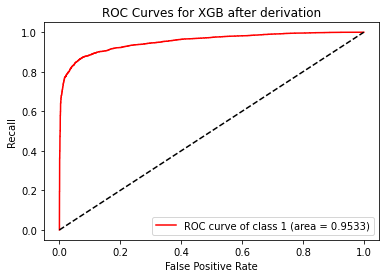

In [24]:
FPR, recall, thesholds = roc_curve(y_test, y_pred, pos_label = 1)
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve of class 1 (area = %0.4f)' % AUC(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC Curves for XGB after derivation')
plt.legend(loc="lower right")
plt.savefig("XGB_after",dpi=1000)
plt.show()

## 决策树

In [65]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
clf_tree.score(X_test, y_test), clf_tree.score(X_train, y_train)

(0.8232912013744018, 1.0)

In [109]:
param_grid_simple = {'max_depth': hp.quniform("max_depth",130,150,1)
                    ,"min_samples_split": hp.quniform("min_samples_split",30,40,1)
                    ,"min_samples_leaf":hp.quniform("min_samples_leaf",45,55,1)
                     }

In [110]:
def hyperopt_objective(params):
    clf_tree = DecisionTreeClassifier(max_depth = int(params["max_depth"])
              ,min_samples_split = int(params["min_samples_split"])
              ,criterion = "entropy"
              ,max_features = "sqrt"
              ,min_samples_leaf = int(params["min_samples_leaf"])
              ,random_state=1412
              )
    clf_tree.fit(X_train, y_train)
    score = clf_tree.score(X_test, y_test)
    return -score

In [111]:
# 定义优化函数
def param_hyperopt(max_evals):
    #定义代理模型
    params_best = fmin(fn = hyperopt_objective #目标函数
                       , space = param_grid_simple #参数空间
                       , algo = tpe.suggest 
                       , max_evals = max_evals #允许的迭代次数
                      )
    return params_best

In [114]:
params_best = param_hyperopt(7000)

100%|█████████████████████████████████████████| 7000/7000 [1:31:33<00:00,  1.27trial/s, best loss: -0.8819487053626212]


In [115]:
params_best

{'max_depth': 144.0, 'min_samples_leaf': 48.0, 'min_samples_split': 33.0}

In [138]:
score = []
for i in tqdm(np.arange(30000, 40000, 1)):
    clf_tree = DecisionTreeClassifier(max_depth = 144
              ,min_samples_split = 33
              ,criterion = "entropy"
              ,max_features = "sqrt"
              ,min_samples_leaf = 48
              ,random_state= i
              )
    clf_tree.fit(X_train, y_train)
    score.append(clf_tree.score(X_test, y_test))
print(max(score))
print(np.argmax(score))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [1:28:33<00:00,  1.88it/s]

0.8869799975457111
749


In [ ]:
0.8824395631365812

In [37]:
clf_tree = DecisionTreeClassifier(max_depth = 144
              ,min_samples_split = 33
              ,criterion = "entropy"
              ,max_features = "sqrt"
              ,min_samples_leaf = 48
              ,random_state= 30749
              )
clf_tree.fit(X_train, y_train)
clf_tree.score(X_test, y_test), clf_tree.score(X_train, y_train)

(0.8869799975457111, 0.8784977908689249)

In [26]:
precision_score(y_test, clf_tree.predict(X_test)) #精确度

0.9184890656063618

In [27]:
recall_score(y_test, clf_tree.predict(X_test))

0.861739333177897

In [28]:
f1_score(y_test, clf_tree.predict(X_test))

0.8892096715987009

In [29]:
AUC(y_test, clf_tree.predict_proba(X_test)[:, 1])

0.9403847292205508

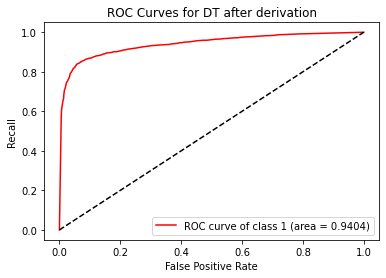

In [30]:
FPR, recall, thesholds = roc_curve(y_test, clf_tree.predict_proba(X_test)[:, 1], pos_label = 1)
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve of class 1 (area = %0.4f)' % AUC(y_test, clf_tree.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC Curves for DT after derivation')
plt.legend(loc="lower right")
plt.savefig("DT_after",dpi=1000)
plt.show()

In [43]:
dump(clf_tree, 'clf_tree.joblib') 

['clf_tree.joblib']

In [25]:
clf_tree = load('clf_tree.joblib') 
clf_tree.score(X_test, y_test), clf_tree.score(X_train, y_train)

(0.8869799975457111, 0.8784977908689249)

## LGBM

In [146]:
gbm = LGBMClassifier()
gbm.fit(X_train, y_train)
gbm.score(X_test, y_test)

[LightGBM] [Info] Number of positive: 12919, number of negative: 11525
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.180138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 292933
[LightGBM] [Info] Number of data points in the train set: 24444, number of used features: 2494
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528514 -> initscore=0.114181
[LightGBM] [Info] Start training from score 0.114181


0.8916431463983311

In [25]:
param_grid_simple = {'n_estimators': hp.quniform("n_estimators",50,200,10)
                  ,"learning_rate": hp.quniform("learning_rate",0.05,0.15,0.001)
                  ,"max_features": hp.choice("max_features",["log2","sqrt",1000,2000,2598])
                  ,"colsample_bytree":hp.quniform("colsample_bytree",0.4,0.6,0.01)
                  ,"max_depth":hp.quniform("max_depth",100,200,10)
                  ,"min_child_samples":hp.quniform("min_child_samples",20,40,5)
                  ,"num_leaves":hp.quniform("num_leaves",120,200,10)
                 }

In [26]:
def hyperopt_objective(params):
    clf_lgbm = LGBMClassifier(n_estimators = int(params["n_estimators"])
                             ,learning_rate = params["learning_rate"]
                             ,max_features = params["max_features"]
                             ,colsample_bytree = params["colsample_bytree"]
                             ,max_depth = int(params["max_depth"])
                             ,min_child_samples = int(params["min_child_samples"])
                             ,n_jobs = 30
                             ,random_state = 1412
                             ,num_leaves = int(params["num_leaves"])
                              )
    clf_lgbm.fit(X_train, y_train)
    score = clf_lgbm.score(X_test, y_test)
    return -score

In [27]:
# 定义优化函数
def param_hyperopt(max_evals):
    #定义代理模型
    params_best = fmin(fn = hyperopt_objective #目标函数
                       , space = param_grid_simple #参数空间
                       , algo = tpe.suggest 
                       , max_evals = max_evals #允许的迭代次数
                      )
    return params_best

In [28]:
params_best = param_hyperopt(7000)

[LightGBM] [Warning] Unknown parameter: max_features                                                                   
[LightGBM] [Warning] Unknown parameter: max_features                                                                   
[LightGBM] [Info] Number of positive: 12919, number of negative: 11525                                                 
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.157553 seconds.             
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 292911                                                                                    
[LightGBM] [Info] Number of data points in the train set: 24444, number of used features: 2491                         
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528514 -> initscore=0.114181                                         
[LightGBM] [Info] Start training from score 0.114181                                                  

KeyboardInterrupt: 

In [11]:
params_best

{'colsample_bytree': 0.43,
 'learning_rate': 0.1,
 'max_depth': 70.0,
 'max_features': 2,
 'min_child_samples': 37.0,
 'n_estimators': 51.0,
 'num_leaves': 109.0}

In [12]:
param_grid_simple = {'n_estimators': hp.quniform("n_estimators",45,55,1)
                  ,"learning_rate": hp.quniform("learning_rate",0.05,0.15,0.001)
                  ,"max_features": hp.choice("max_features",["log2","sqrt",1000,2000,2598])
                  ,"colsample_bytree":hp.quniform("colsample_bytree",0.4,0.6,0.01)
                  ,"max_depth":hp.quniform("max_depth",60,90,1)
                  ,"min_child_samples":hp.quniform("min_child_samples",30,50,1)
                  ,"num_leaves":hp.quniform("num_leaves",90,130,1)
                  ,"random_state":hp.quniform("random_state",0,1,1)
                 }

In [13]:
LGBMClassifier?

In [173]:
params_best

{'colsample_bytree': 0.5,
 'learning_rate': 0.08,
 'max_depth': 83.0,
 'max_features': 0,
 'min_child_samples': 46.0,
 'n_estimators': 54.0,
 'num_leaves': 100.0}

In [29]:
clf_lgbm = LGBMClassifier(n_estimators = 51
                             ,learning_rate = 0.1
                             ,max_features = 1000
                             ,colsample_bytree = 0.43
                             ,max_depth = 70
                             ,min_child_samples = 37
                             ,n_jobs = 30
                             ,random_state = 1412
                             ,num_leaves = 109
                              )
clf_lgbm.fit(X_train, y_train)
clf_lgbm.score(X_test, y_test), clf_lgbm.score(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Number of positive: 12919, number of negative: 11525
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 292892
[LightGBM] [Info] Number of data points in the train set: 24444, number of used features: 2488
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528514 -> initscore=0.114181
[LightGBM] [Info] Start training from score 0.114181
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


(0.898883298564241, 0.9471854033709703)

In [32]:
precision_score(y_test, clf_lgbm.predict(X_test)) #精确度

[LightGBM] [Warning] Unknown parameter: max_features


0.927039684495933

In [33]:
recall_score(y_test, clf_lgbm.predict(X_test))

[LightGBM] [Warning] Unknown parameter: max_features


0.8768943809745862

In [34]:
f1_score(y_test, clf_lgbm.predict(X_test))

[LightGBM] [Warning] Unknown parameter: max_features


0.9012700694943686

In [35]:
AUC(y_test, clf_lgbm.predict_proba(X_test)[:, 1])

[LightGBM] [Warning] Unknown parameter: max_features


0.9534744260833534

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


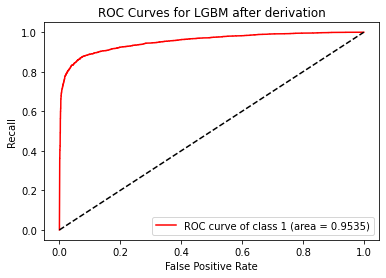

In [36]:
FPR, recall, thesholds = roc_curve(y_test, clf_lgbm.predict_proba(X_test)[:, 1], pos_label = 1)
plt.figure()
plt.plot(FPR, recall, color='red',
         label='ROC curve of class 1 (area = %0.4f)' % AUC(y_test, clf_lgbm.predict_proba(X_test)[:, 1]))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC Curves for LGBM after derivation')
plt.legend(loc="lower right")
plt.savefig("LGBM_after",dpi=1000)
plt.show()

In [35]:
dump(clf_lgbm, 'clf_lgbm.joblib') 

['clf_lgbm.joblib']

In [31]:
clf_lgbm = load('clf_lgbm.joblib') 
clf_lgbm.score(X_test, y_test), clf_lgbm.score(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features


(0.898883298564241, 0.9471854033709703)